In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import glob, os
import csv
import datetime
from geopy import distance
import numpy as np
import time
import gmaps
import gmaps.datasets
from googlemaps import Client as GoogleMaps
import requests
import calendar
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import scipy.stats as st
from scipy.stats import linregress

In [2]:
Bike_2019_clean = pd.read_csv("../Group-Project_team3/Resources/Bike_2019_clean.csv", index_col=[0])
Bike_2020_clean = pd.read_csv("../Group-Project_team3/Resources/Bike_2020_clean.csv", index_col=[0])


/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
Bike_2019_clean.sample(5)

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,start_lat,start_lng,end_lat,end_lng,day_of_week,Distance Traveled,year,Month,Hour,Id
47185,265,2019-04-17 20:02:00,2019-04-17 20:07:00,31265,5th St & Massachusetts Ave NW,31638,1st & H St NW,W23351,Member,38.954294,-77.019800,38.964195,-77.502419,Wednesday,41.74,2019,Apr,20,31265-31638
520632,532,2019-06-16 11:57:00,2019-06-16 12:06:00,31234,20th & O St NW / Dupont South,31275,New Hampshire Ave & 24th St NW,W00605,Member,38.911006,-77.044751,39.096994,-77.002629,Sunday,21.00,2019,Jun,11,31234-31275
436984,226,2019-04-04 10:31:00,2019-04-04 10:34:00,31633,Independence Ave & L'Enfant Plaza SW/DOE,31646,Maine Ave & 9th St SW,78332,Member,38.887568,-77.029503,38.882072,-77.028743,Thursday,0.61,2019,Apr,10,31633-31646
435266,969,2019-05-24 23:28:00,2019-05-24 23:44:00,31648,Potomac Ave & Half St SW,31646,Maine Ave & 9th St SW,W20455,Casual,38.880848,-76.985199,38.882072,-77.028743,Friday,3.77,2019,May,23,31648-31646
622627,173,2019-04-11 19:41:00,2019-04-11 19:44:00,31651,11th & Park Rd NW,31124,14th & Irving St NW,W23166,Member,38.808228,-77.263504,38.917555,-77.032473,Thursday,23.41,2019,Apr,19,31651-31124


In [4]:
Bike_2020_clean.drop(["is_equity"], axis = 1, inplace =True)
Bike_2020_clean.sample(5)

,Id,rideable_type,Start date,End date,Start station,start_station_id,End station,end_station_id,start_lat,start_lng,end_lat,end_lng,Distance Traveled,Member type,day_of_week,year,Duration,Month,Hour
194235,9A3F233B03BD7C5E,docked_bike,2020-05-10 11:31:00,2020-05-10 12:18:00,Gravelly Point,230.0,Eads St & 15th St S,1.0,38.865000,-77.039500,38.859000,-77.05320,1.360939,casual,Sunday,2020,2820,May,19
14154,C9FA8D7CA907758F,docked_bike,2020-04-27 17:55:00,2020-04-27 18:10:00,Woodmont Ave & Strathmore St,432.0,Connecticut & Nebraska Ave NW,133.0,38.979900,-77.093500,38.955000,-77.07000,3.434198,member,Monday,2020,900,Apr,11
166404,9DDFAA2333E40097,docked_bike,2020-05-16 16:27:00,2020-05-16 17:36:00,Sunset Hills & Old Reston Ave,480.0,Sunset Hills & Old Reston Ave,480.0,38.955100,-77.351600,38.955100,-77.35160,0.000000,casual,Saturday,2020,4140,May,1
208930,13CF0B318DB77B21,docked_bike,2020-05-23 16:17:00,2020-05-23 16:32:00,Wisconsin Ave & Newark St NW,105.0,Connecticut Ave & Newark St NW / Cleveland Park,108.0,38.934900,-77.072800,38.934300,-77.05800,1.281856,member,Saturday,2020,900,May,14
335523,FB692864652F696B,docked_bike,2020-06-23 09:46:00,2020-06-23 09:53:00,Rhode Island Ave Metro,368.0,Eckington Pl & Q St NE,115.0,38.920682,-76.995876,38.910972,-77.00495,1.334944,member,Tuesday,2020,420,Jun,22


In [15]:
rides_2019 = len(Bike_2019_clean)
rides_2020 = len(Bike_2020_clean)
diff_19_20 = (rides_2019 - rides_2020)

april_19 = len(Bike_2019_clean[Bike_2019_clean.Month == "Apr"])
april_20 = len(Bike_2020_clean[Bike_2020_clean.Month == "Apr"])
april_19_20 = (april_19 - april_20)

may_19 = len(Bike_2019_clean[Bike_2019_clean.Month == "May"])
may_20 = len(Bike_2020_clean[Bike_2020_clean.Month == "May"])
may_19_20 = (may_19 - may_20)

june_19 = len(Bike_2019_clean[Bike_2019_clean.Month == "Jun"])
june_20 = len(Bike_2020_clean[Bike_2020_clean.Month == "Jun"])
june_19_20 = (june_19 - june_20)

# Alternative way to subtract data frame's column's values (month values)
#alt_way1 = Bike_2019_clean["Month"].value_counts()
#alt_way2 = Bike_2020_clean["Month"].value_counts()
#diff = (alt_way1 - alt_way2)
#diff

apple = pd.DataFrame({ "2019 Total":rides_2019,
                      "2020 Total":rides_2020,
                      "Year 19/20":diff_19_20,
                     "April 19/20":april_19_20,
                      "May 19/20":may_19_20,
                      "June 19/20":june_19_20}, index =["Differences"])

apple["2019 Total"] = apple.apply(lambda x: "{:,}".format(x["2019 Total"]), axis = 1)
apple["2020 Total"] = apple.apply(lambda x: "{:,}".format(x["2020 Total"]), axis = 1)
apple["Year 19/20"] = apple.apply(lambda x: "{:,}".format(x["Year 19/20"]), axis = 1)
apple["April 19/20"] = apple.apply(lambda x: "{:,}".format(x["April 19/20"]), axis = 1)
apple["May 19/20"] = apple.apply(lambda x: "{:,}".format(x["May 19/20"]), axis = 1)
apple["June 19/20"] = apple.apply(lambda x: "{:,}".format(x["June 19/20"]), axis = 1)

apple


,2019 Total,2020 Total,Year 19/20,April 19/20,May 19/20,June 19/20
Differences,"820,836","424,696","396,140","198,819","126,475","70,846"


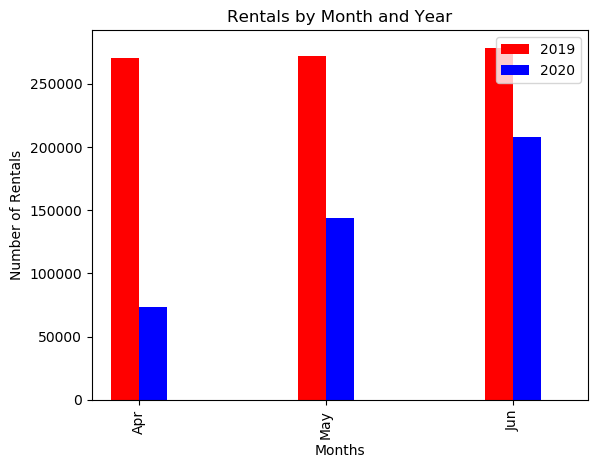

In [16]:
colors = ['#034694','#001C58','#5CBFEB']
bar_width = .15
b_2019 = Bike_2019_clean["Month"].value_counts().sort_values(ascending= True)
b_2020 =Bike_2020_clean['Month'].value_counts().sort_values(ascending=True)
#b_2019.plot(kind = 'bar', title ="Rentals by Month",fontsize=12, color = colors, position=1)
b_2019.plot(kind='bar', color='red', width=bar_width, position =1)
b_2020.plot(kind='bar', color='blue', width=bar_width, position=0)

plt.xlabel("Months")
plt.ylabel("Number of Rentals")
plt.title("Rentals by Month and Year")
plt.legend(["2019", "2020"])
plt.savefig('images/ridesPer_month.png', dpi=300, bbox_inches='tight')
plt.show()


In [8]:
member = Bike_2020_clean.groupby('Member type').agg('count')
member_2019 = Bike_2019_clean.groupby("Member type").agg("count")


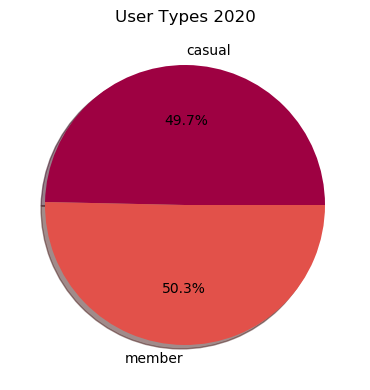

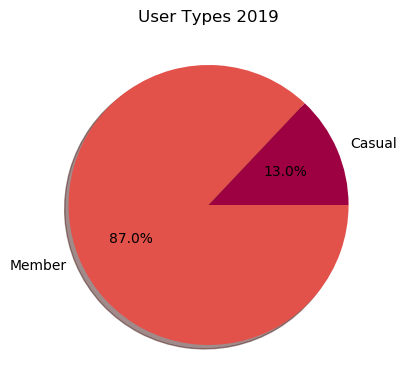

In [17]:
type_labels = member.Duration.sort_values().index 
type_counts = member.Duration.sort_values()
type_counts2 = member_2019.Duration.sort_values()
type_labels2 = member_2019.Duration.sort_values().index
# print(f'During the second quarter of 2020 (Covid-19) bike rentals were evenly split between casual renters\
#  ({[type_counts][0][0]}) and\
#  members({[type_counts][0][1]})')
# print(f'During the second quarter of 2019 (pre-Covid-19) bikes were primarily rented(85%) by members\
#  ({[type_counts2][0][0]}) and\
#  casual renters({[type_counts2][0][1]})')
# #print(f'({type_counts}')
plt.figure(0, figsize=(20,10)) 
the_grid = GridSpec(2,2,)
cmap = plt.get_cmap('Spectral')
color1=['#034694','#001C58']
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='User Types 2020')
type_members = plt.pie(type_counts, labels=type_labels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.figure(1, figsize=(20,10)) 
the_grid = GridSpec(2,2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='User Types 2019')
type_members2 = plt.pie(type_counts2, labels = type_labels2,autopct='%1.1f%%', shadow=True, colors=colors)
plt.savefig('images/User_types19_20.png', dpi=300, bbox_inches='tight')
plt.show()

In [10]:
# hour_use =Bike_2020_clean.groupby(['Start date', "Hour", "Member type"])['Id'].nunique().groupby(['Hour', 'Member type']).count().reset_index()
# fig, ax = plt.subplots(figsize=(16,9))
# sns.barplot(x='Hour', y='Id', hue='Member type', data=hour_use, ax=ax)
# ax.set_ylabel("Number Trips by Hour(2020)")
# ax.set_xlabel("Hours in military time")
# plt.savefig('images/tripsByHour2020.png', dpi=300, bbox_inches='tight')
# hour_use19 =Bike_2019_clean.groupby(['Start date', "Hour", "Member type"])['Id'].nunique().groupby(['Hour', 'Member type']).count().reset_index()
# fig, ax = plt.subplots(figsize=(16,9))
# sns.barplot(x='Hour', y='Id', hue='Member type', data=hour_use19, ax=ax)
# ax.set_ylabel("Number Trips by Hour(2019)")
# ax.set_xlabel("Hours in military time")
# plt.savefig('images/tripsByHour2019.png', dpi=300, bbox_inches='tight')

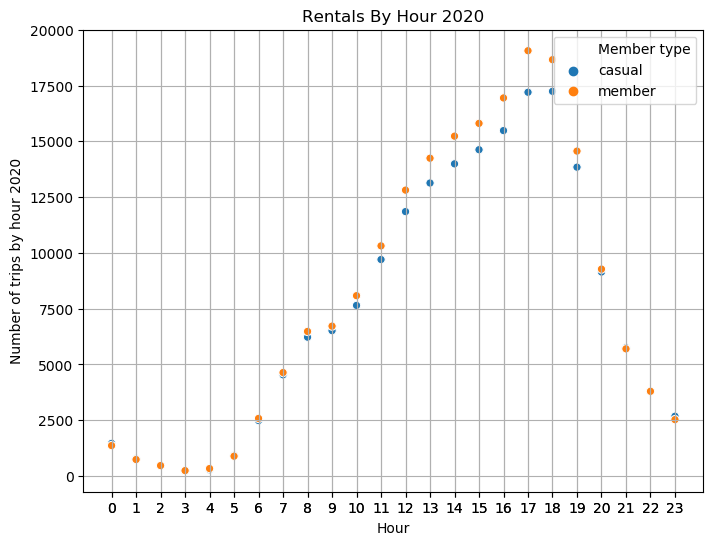

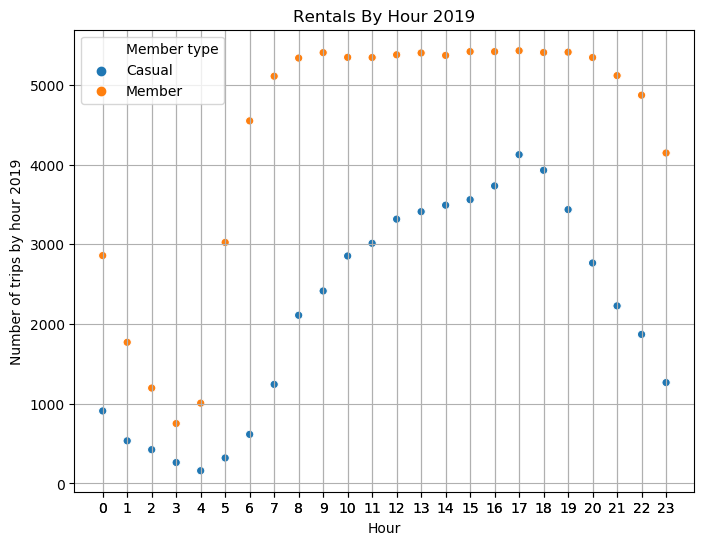

In [18]:
hour_use =Bike_2020_clean.groupby(['Start date', "Hour", "Member type"])['Id'].nunique().groupby(['Hour', 'Member type']).count().reset_index()
hour_use19 =Bike_2019_clean.groupby(['Start date', "Hour", "Member type"])['Id'].nunique().groupby(['Hour', 'Member type']).count().reset_index()
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x='Hour', y='Id', hue='Member type', data=hour_use)
plt.title("Rentals By Hour 2020")
plt.xlabel("Hour")
plt.ylabel("Number of trips by hour 2020")
plt.xticks(hour_use.Hour.values)
plt.grid(True)
plt.show()

fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x='Hour', y='Id', hue='Member type', data=hour_use19)
plt.title("Rentals By Hour 2019")
plt.xlabel("Hour")
plt.ylabel("Number of trips by hour 2019")
plt.xticks(hour_use19.Hour.values)
#x_values = hour_use19['Hour']
#y_values =hour_use19['Id']
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(17,35),fontsize=15,color="black")
#correlation = st.pearsonr(x_values,y_values)
plt.grid(True)
plt.show()

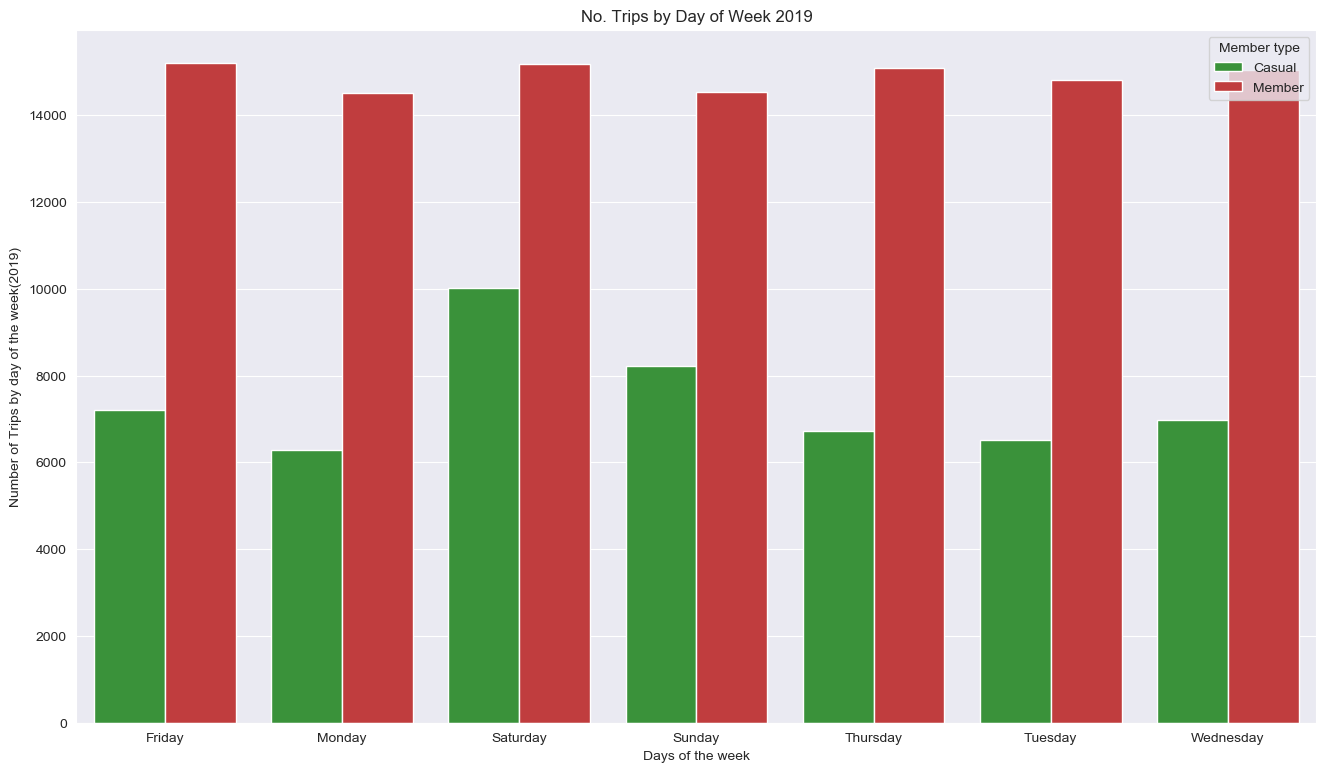

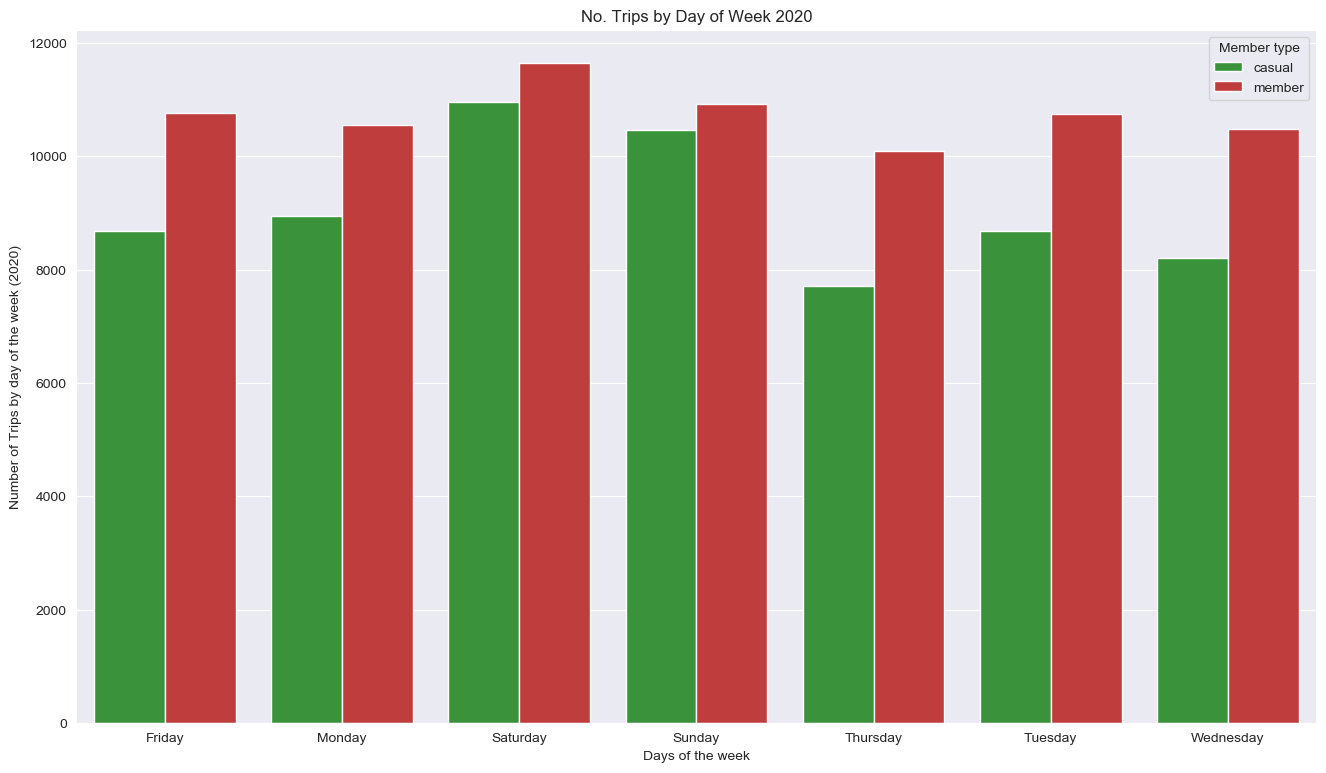

In [21]:
sns.set_style('darkgrid')
unique = hour_use19["Member type"].append(hour_use["Member type"]).unique()
unique1 = hour_use["Member type"].append(hour_use19["Member type"]).unique()
palette = dict(zip(unique, sns.color_palette()))
palette1 = dict(zip(unique1, sns.color_palette()))
palette.update({"Total":"k"})
hour_use19 =Bike_2019_clean.groupby(['Start date', "day_of_week", "Member type"])['Id'].nunique().groupby(['day_of_week', 'Member type']).count().reset_index()
fig, ax = plt.subplots(figsize=(16,9))
plt.title("No. Trips by Day of Week 2019")
sns.barplot(x='day_of_week', y='Id', hue='Member type', data=hour_use19, ax=ax,ci=None, palette=palette1)
ax.set_ylabel("Number of Trips by day of the week(2019)")
ax.set_xlabel("Days of the week")
plt.savefig('images/tripsByDay2019.png', dpi=300, bbox_inches='tight')
hour_use =Bike_2020_clean.groupby(['Start date', "day_of_week", "Member type"])['Id'].nunique().groupby(['day_of_week', 'Member type']).count().reset_index()
fig, ax = plt.subplots(figsize=(16,9))
plt.title("No. Trips by Day of Week 2020")
sns.barplot(x='day_of_week', y='Id', hue='Member type', data=hour_use, ax=ax, ci=None, palette=palette)
ax.set_ylabel("Number of Trips by day of the week (2020)")
ax.set_xlabel("Days of the week")
plt.savefig('images/tripsByDay2020.png', dpi=300, bbox_inches='tight')

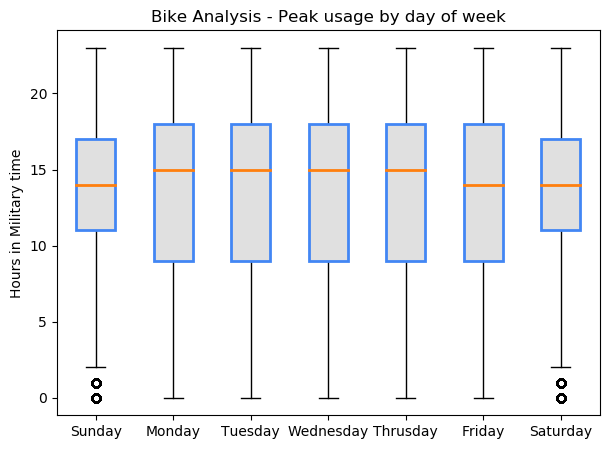

In [22]:
# Hina Graph Box Plot 


# Create and format Box Plot 


temp_df = Bike_2019_clean[["day_of_week", "Hour"]]
Sunday = temp_df[temp_df.day_of_week == "Sunday"]
Monday = temp_df[temp_df.day_of_week == "Monday"]
Tuesday = temp_df[temp_df.day_of_week == "Tuesday"]
Wednesday = temp_df[temp_df.day_of_week == "Wednesday"]
Thursday = temp_df[temp_df.day_of_week == "Thursday"]
Friday = temp_df[temp_df.day_of_week == "Friday"]
Saturday = temp_df[temp_df.day_of_week == "Saturday"]


plt.style.use('default')

plt.figure(figsize=(7,5))

labels = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thrusday", "Friday", "Saturday"]
      

boxes = plt.boxplot([Sunday.Hour, Monday.Hour, Tuesday.Hour, Wednesday.Hour, Thursday.Hour, Friday.Hour, Saturday.Hour], labels=labels, patch_artist=True, medianprops = {'linewidth':2})

for box in boxes ['boxes']:
    box.set(color='#4286f4', linewidth =2)
    
    box.set(facecolor='#e0e0e0')

plt.title ("Bike Analysis - Peak usage by day of week")
plt.ylabel ("Hours in Military time")
plt.savefig('images/peak_Usage_dayofweek.png', dpi=300, bbox_inches='tight')
plt.show()